<a href="https://colab.research.google.com/github/Likitha110/AflidoTech/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"likithakyama","key":"15c0f788e05291978ca615ad6e6d7c8b"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d sherinclaudia/movielens

  0% 0.00/5.83M [00:00<?, ?B/s]
100% 5.83M/5.83M [00:00<00:00, 110MB/s]


In [5]:
!unzip /content/movielens.zip

Archive:  /content/movielens.zip
  inflating: movies.dat              
  inflating: ratings.dat             
  inflating: users.dat               


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
movie_data = pd.read_csv('/content/movies.csv', sep='::',engine='python', encoding='latin1')

In [10]:
movie_data.columns=['MovieID','MovieName','Genres']
movie_data.dropna(inplace=True)

In [11]:
movie_data.head()

,MovieID,MovieName,Genres
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,"
1,3,Grumpier Old Men (1995),"Comedy|Romance,,"
2,4,Waiting to Exhale (1995),"Comedy|Drama,,"
3,5,Father of the Bride Part II (1995),"Comedy,,"
4,6,Heat (1995),"Action|Crime|Thriller,,"


In [12]:
movie_data.shape


(3882, 3)

In [13]:
rating_data= pd.read_csv('/content/ratings.txt', sep='::',engine='python', encoding='latin1')


In [14]:
rating_data.columns=['ID','MovieID','Ratings','Timestamp']
rating_data.dropna(inplace=True)

In [15]:
rating_data.head()

,ID,MovieID,Ratings,Timestamp
0,1,661.0,3.0,978302109.0
1,1,914.0,3.0,978301968.0
2,1,3408.0,4.0,978300275.0
3,1,2355.0,5.0,978824291.0
4,1,1197.0,3.0,978302268.0


In [16]:
rating_data.shape

(88828, 4)

In [17]:
user_data= pd.read_csv('/content/users.txt', sep='::',engine='python', encoding='latin1')


In [18]:
user_data.columns=['UserID','Gender','Age','category','Zip-code']
user_data.dropna(inplace=True)

In [19]:
user_data.head()

,UserID,Gender,Age,category,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [20]:
user_data.shape

(6039, 5)

In [21]:
dataset=pd.concat([movie_data,rating_data,user_data],axis=1)
dataset.head()

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,category,Zip-code
0,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,",1,661.0,3.0,978302109.0,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),"Comedy|Romance,,",1,914.0,3.0,978301968.0,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),"Comedy|Drama,,",1,3408.0,4.0,978300275.0,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),"Comedy,,",1,2355.0,5.0,978824291.0,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),"Action|Crime|Thriller,,",1,1197.0,3.0,978302268.0,6.0,F,50.0,9.0,55117


In [22]:
dataset.shape


(88828, 12)

In [23]:
dataset.isnull().sum()

MovieID      84946
MovieName    84946
Genres       84946
ID               0
MovieID          0
Ratings          0
Timestamp        0
UserID       82789
Gender       82789
Age          82789
category     82789
Zip-code     82789
dtype: int64

In [24]:
unique_genres=dataset['Genres'].unique()
print("unique_genres:",unique_genres)

unique_genres: ["Adventure|Children's|Fantasy,," 'Comedy|Romance,,' 'Comedy|Drama,,'
 'Comedy,,' 'Action|Crime|Thriller,,' "Adventure|Children's,," 'Action,,'
 'Action|Adventure|Thriller,,' 'Comedy|Drama|Romance,' 'Comedy|Horror,,'
 "Animation|Children's,," 'Drama,,' 'Action|Adventure|Romance,,'
 'Drama|Thriller,,' 'Drama|Romance,,' 'Thriller,,' 'Action|Comedy|Drama,,'
 'Crime|Drama|Thriller,,' 'Drama|Sci-Fi,,' 'Romance,,' 'Adventure|Sci-Fi,'
 'Adventure|Romance,,' "Children's|Comedy|Drama,," 'Documentary,,'
 'Drama,' 'Drama|War,,' 'Action|Crime|Drama,,' 'Action|Adventure,,'
 'Crime|Thriller,,' "Animation|Children's|Musical|Romance,,"
 'Crime|Thriller,' 'Action|Drama|Thriller,,' "Children's|Comedy,"
 'Drama|Romance,' 'Drama|Mystery,' "Adventure|Children's|Fantasy,"
 'Sci-Fi|Thriller,,' 'Action|Comedy|Crime|Horror|Thriller,,'
 'Drama|Musical,' 'Drama|Thriller,' 'Crime|Drama|Romance,,'
 'Adventure|Drama,,' "Children's|Comedy,," 'Action|Thriller,,'
 "Adventure|Children's|Comedy|Musical,,"

In [25]:
dataset.drop_duplicates(inplace=True)

In [26]:
attributes=["MovieName","Genres","Gender","Age","Ratings"]
dataset.dropna(subset=attributes,inplace=True)
missing_value=dataset.isna().sum()
print(missing_value)

MovieID      0
MovieName    0
Genres       0
ID           0
MovieID      0
Ratings      0
Timestamp    0
UserID       0
Gender       0
Age          0
category     0
Zip-code     0
dtype: int64


In [27]:
dataset

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,category,Zip-code
0,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,",1,661.0,3.0,978302109.0,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),"Comedy|Romance,,",1,914.0,3.0,978301968.0,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),"Comedy|Drama,,",1,3408.0,4.0,978300275.0,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),"Comedy,,",1,2355.0,5.0,978824291.0,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),"Action|Crime|Thriller,,",1,1197.0,3.0,978302268.0,6.0,F,50.0,9.0,55117
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,3948.0,Meet the Parents (2000),"Comedy,,",28,334.0,4.0,978125960.0,3879.0,M,25.0,3.0,83687
3878,3949.0,Requiem for a Dream (2000),"Drama,,",28,266.0,2.0,978982323.0,3880.0,M,25.0,7.0,54942
3879,3950.0,Tigerland (2000),"Drama,,",28,2174.0,3.0,978126491.0,3881.0,M,18.0,2.0,44515
3880,3951.0,Two Family House (2000),"Drama,,",28,912.0,5.0,978985294.0,3882.0,M,56.0,14.0,55337


In [28]:
top_rated_movies=dataset[["MovieName","Ratings"]]
print(top_rated_movies)

                               MovieName  Ratings
0                         Jumanji (1995)      3.0
1                Grumpier Old Men (1995)      3.0
2               Waiting to Exhale (1995)      4.0
3     Father of the Bride Part II (1995)      5.0
4                            Heat (1995)      3.0
...                                  ...      ...
3877             Meet the Parents (2000)      4.0
3878          Requiem for a Dream (2000)      2.0
3879                    Tigerland (2000)      3.0
3880             Two Family House (2000)      5.0
3881               Contender, The (2000)      4.0

[3882 rows x 2 columns]


**Data Visualization**

<Axes: xlabel='Gender', ylabel='count'>

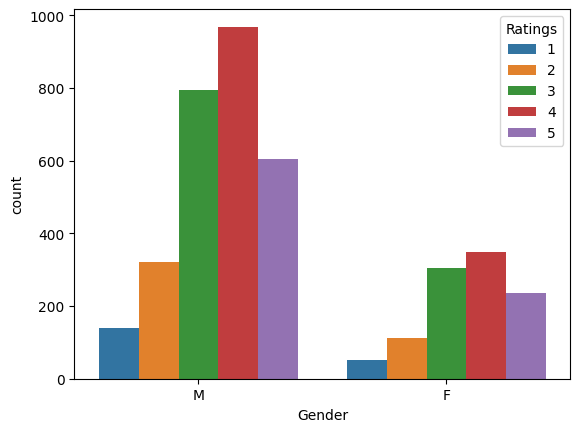

In [ ]:
sns.countplot(x=dataset['Gender'],hue=dataset['Ratings'])

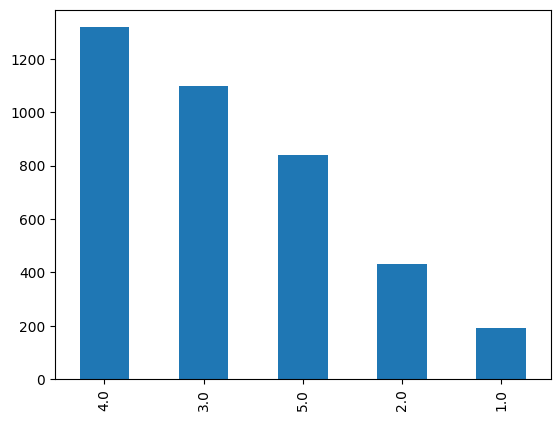

In [29]:
dataset['Ratings'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

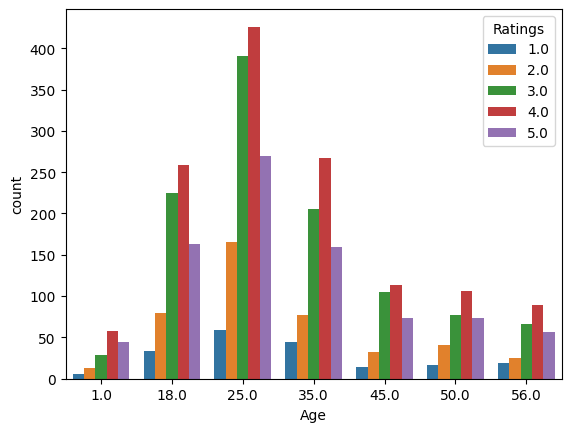

In [30]:
sns.countplot(x=dataset['Age'],hue=dataset['Ratings'])

In [31]:
dataset.head()

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,category,Zip-code
0,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,",1,661.0,3.0,978302109.0,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),"Comedy|Romance,,",1,914.0,3.0,978301968.0,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),"Comedy|Drama,,",1,3408.0,4.0,978300275.0,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),"Comedy,,",1,2355.0,5.0,978824291.0,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),"Action|Crime|Thriller,,",1,1197.0,3.0,978302268.0,6.0,F,50.0,9.0,55117


In [32]:
x=dataset.drop(["MovieName","Genres","MovieID","Timestamp","Zip-code","Ratings","Gender"],axis=1)
y=dataset["Ratings"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()
scaler_data=scaler.fit_transform(x)
scaled_df=pd.DataFrame(scaler_data,columns=x.columns)
scaled_df.head()

,ID,UserID,Age,category
0,0.0,0.000000,1.000000,0.80
1,0.0,0.000258,0.436364,0.75
2,0.0,0.000515,0.800000,0.35
3,0.0,0.000773,0.436364,1.00
4,0.0,0.001031,0.890909,0.45


**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [39]:
predictions=logmodel.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00        40\n         2.0       0.00      0.00      0.00        75\n         3.0       0.29      0.26      0.27       210\n         4.0       0.35      0.78      0.48       263\n         5.0       0.00      0.00      0.00       189\n\n    accuracy                           0.33       777\n   macro avg       0.13      0.21      0.15       777\nweighted avg       0.20      0.33      0.24       777\n'

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[  0,   0,  14,  26,   0],
       [  0,   0,  23,  52,   0],
       [  0,   0,  55, 155,   0],
       [  0,   0,  58, 205,   0],
       [  0,   0,  42, 147,   0]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.33462033462033464

**KNeighbors Classifier**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
predictions=knn_model.predict(x_test)

In [46]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         1.0       0.15      0.07      0.10        40\n         2.0       0.14      0.15      0.14        75\n         3.0       0.31      0.41      0.35       210\n         4.0       0.38      0.41      0.40       263\n         5.0       0.32      0.19      0.24       189\n\n    accuracy                           0.32       777\n   macro avg       0.26      0.25      0.25       777\nweighted avg       0.31      0.32      0.31       777\n'

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[  3,   7,  17,   9,   4],
       [  1,  11,  42,  12,   9],
       [  6,  28,  87,  70,  19],
       [  8,  19,  84, 108,  44],
       [  2,  13,  54,  84,  36]])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.3153153153153153

**Naive Bayes**

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [52]:
predictions=nb_model.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00        40\n         2.0       0.00      0.00      0.00        75\n         3.0       0.32      0.38      0.35       210\n         4.0       0.36      0.66      0.47       263\n         5.0       0.24      0.07      0.11       189\n\n    accuracy                           0.34       777\n   macro avg       0.18      0.22      0.18       777\nweighted avg       0.27      0.34      0.28       777\n'

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[  0,   0,  16,  23,   1],
       [  0,   0,  41,  28,   6],
       [  0,   0,  79, 119,  12],
       [  0,   0,  68, 173,  22],
       [  0,   0,  43, 133,  13]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.3410553410553411

**Support vector classifier**

In [58]:
from sklearn.svm import SVC

In [59]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [60]:
predictions=svm_model.predict(x_test)

In [61]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00        40\n         2.0       0.00      0.00      0.00        75\n         3.0       0.33      0.23      0.27       210\n         4.0       0.36      0.86      0.51       263\n         5.0       0.00      0.00      0.00       189\n\n    accuracy                           0.35       777\n   macro avg       0.14      0.22      0.16       777\nweighted avg       0.21      0.35      0.25       777\n'

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[  0,   0,  10,  30,   0],
       [  0,   0,  22,  53,   0],
       [  0,   0,  49, 161,   0],
       [  0,   0,  37, 226,   0],
       [  0,   0,  32, 157,   0]])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.3539253539253539

**DecisionTree Classifier**


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
predictions=decision_tree.predict(x_test)


In [67]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         1.0       0.12      0.12      0.12        40\n         2.0       0.16      0.19      0.18        75\n         3.0       0.29      0.30      0.29       210\n         4.0       0.36      0.37      0.37       263\n         5.0       0.32      0.26      0.29       189\n\n    accuracy                           0.30       777\n   macro avg       0.25      0.25      0.25       777\nweighted avg       0.30      0.30      0.30       777\n'

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 5,  4, 18,  8,  5],
       [ 3, 14, 28, 18, 12],
       [17, 20, 64, 81, 28],
       [13, 27, 66, 98, 59],
       [ 4, 20, 48, 67, 50]])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.2972972972972973

***RandomForest Classifier***

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [71]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=random_forest.predict(x_test)

In [74]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         1.0       0.12      0.12      0.12        40\n         2.0       0.16      0.19      0.18        75\n         3.0       0.29      0.30      0.29       210\n         4.0       0.36      0.37      0.37       263\n         5.0       0.32      0.26      0.29       189\n\n    accuracy                           0.30       777\n   macro avg       0.25      0.25      0.25       777\nweighted avg       0.30      0.30      0.30       777\n'

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 5,  4, 18,  8,  5],
       [ 3, 14, 28, 18, 12],
       [17, 20, 64, 81, 28],
       [13, 27, 66, 98, 59],
       [ 4, 20, 48, 67, 50]])

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.2972972972972973